In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%run ../tools/echelle.py
cb = Calibrations('../calibration_files')

cb.filenames['orders'] = 'pattern_cmos.txt'
#cb.filenames['sphr'] = 'absolute_cmos.sif'
cb.filenames['sphr'] = 'sphere_CMOS.sif'
cb.filenames['bkgr'] = 'sphere_CMOS_bkg.sif'
cb.filenames['wavelength'] = 'Th_wavelength_CMOS.txt'

In [3]:
cb.start()

C:\Users\queez\Dropbox\workspace\Echelle_analizer_v2\tools\echelle.py:134: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([self.order_image(fi, o, sm=True) for o in orders])
C:\Users\queez\Dropbox\workspace\Echelle_analizer_v2\tools\echelle.py:134: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([self.order_image(fi, o, sm=True) for o in orders])


In [4]:
%run ../tools/echelle.py

pth = '../calibration_files/ThAr_10.0s_16bit.sif'

em = EchelleImage(pth,clbr=cb)

In [5]:
em.calculate_order_spectra()
em.correct_order_shapes()

C:\Users\queez\Dropbox\workspace\Echelle_analizer_v2\tools\echelle.py:134: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([self.order_image(fi, o, sm=True) for o in orders])


In [6]:
em.calculate_order_spectra()
print(em.order_spectra.shape)
a = em.order_spectra.copy()
em.correct_order_shapes()
print(em.order_spectra.shape)
b = em.order_spectra.copy()

(1, 29)
(1, 29, 2560)


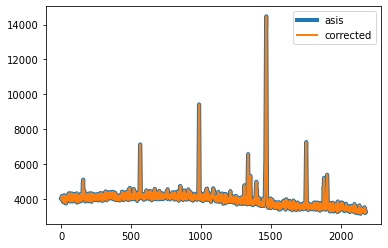

In [7]:
frame = 0
o = 28
plt.plot(a[frame,o],lw=4,label='asis')
plt.plot(b[frame,o],lw=2,ls='-',label='corrected')
plt.legend()

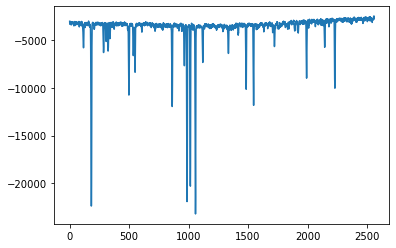

In [8]:
df = 1
f0 = 1 + df*2
o = 6
plt.plot(
    (em.order_spectra[f0:f0+df,o,:].sum(axis=0)-em.order_spectra[0,o,:]*df)/df,
    '-'
)
#ylim([-10,2000])
#xlim(1040,1120)

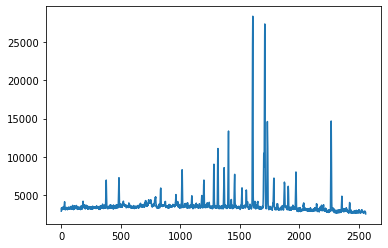

In [9]:
frame = 0
o = 8
plt.plot(em.order_spectra[frame,o,:])

In [10]:
em.calculate_order_spectra()
em.correct_order_shapes()
em.calculate_spectra()
#em.plot_order_image(28,6,20)

C:\Users\queez\Dropbox\workspace\Echelle_analizer_v2\tools\echelle.py:134: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([self.order_image(fi, o, sm=True) for o in orders])


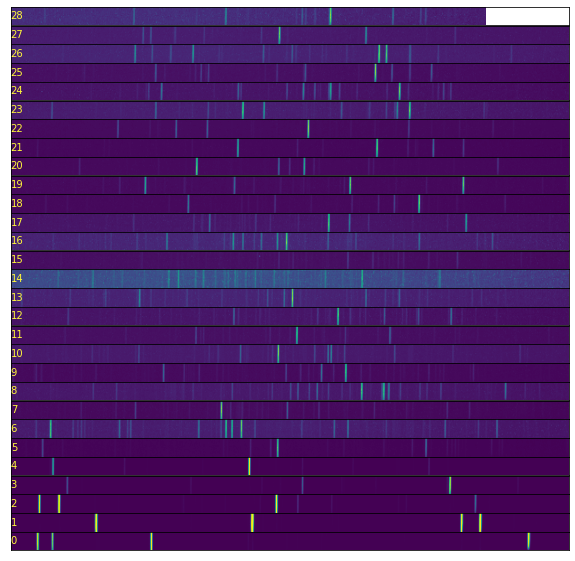

In [11]:
frame = 0
em.plot_cut_image(frame,5)
plt.gcf().set_size_inches(10,10)
#savefig('CMOS_cut.png',dvi=300,pad_inches=0,bbox_inches='tight')

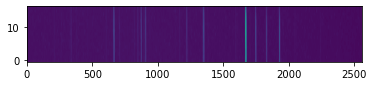

In [12]:
em.plot_order_image(0,25,25)

C:\Users\queez\Dropbox\workspace\Echelle_analizer_v2\tools\echelle.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_xticklabels(


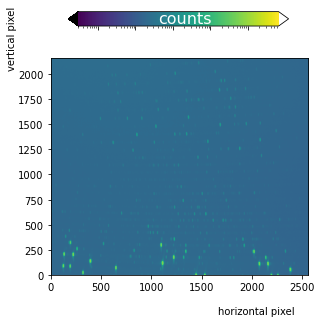

In [13]:
em.plot_frame(0,scale=10)

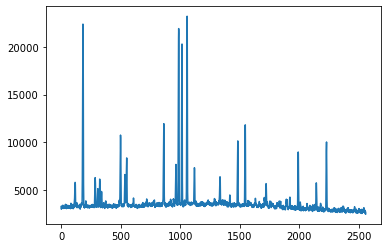

In [14]:
plt.plot(em.order_spectra[0,6,:])

In [15]:
s = Spectrum(em)

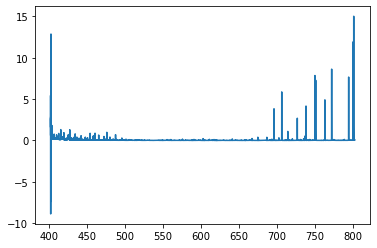

In [16]:
frame = 0
x = s.wavelength
y = s.spectra_to_save['wm'][frame]
plt.plot(x,y)